In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
from api_keys import g_key

In [5]:
toronto_collision= pd.read_csv('Resources/Fatal_Collisions_toronto.csv')

In [6]:
toronto_collision.head()

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourh,ObjectId
0,-79.227590,43.816245,7377669,1275814,2012,2012-01-12T05:00:00.000Z,558,5,NEILSON RD,FINCH AVE E,...,,Yes,,Yes,,,,132,Malvern (132),1
1,-79.447742,43.637614,80000014,131058335,2013,2013-11-29T05:00:00.000Z,558,5,1491 LAKE SHORE BLVD W,,...,,,Yes,Yes,,,,85,South Parkdale (85),2
2,-79.259883,43.716773,80944448,8001077165,2018,2018-06-14T04:00:00.000Z,558,5,ST CLAIR AVE E,DANFORTH RD,...,,,,Yes,,,,120,Clairlea-Birchmount (120),3
3,-79.316890,43.821345,6253540,1162012,2010,2010-04-13T04:00:00.000Z,559,5,STEELES AVE E,BIRCHMOUNT RD,...,,Yes,,Yes,Yes,,Yes,116,Steeles (116),4
4,-79.574641,43.728129,80501551,4003267619,2014,2014-11-09T05:00:00.000Z,559,5,KIPLING AVE,WESTHUMBER BLVD,...,,Yes,,Yes,Yes,,,4,Rexdale-Kipling (4),5


In [7]:
toronto_collision.columns

Index(['X', 'Y', 'Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'Hour', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'WardNum', 'WardNum_X',
       'WardNum_Y', 'Division', 'Division_X', 'Division_Y', 'LATITUDE',
       'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'Hood_ID', 'Neighbourh',
       'ObjectId'],
      dtype='object')

In [8]:
toronto_collision=toronto_collision[['X', 'Y', 'District','YEAR', 'VEHTYPE','DATE', 'Hour', 'ROAD_CLASS', 'RDSFCOND','REDLIGHT','ALCOHOL','AG_DRIV',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK']]


In [9]:
toronto_collision=toronto_collision.rename(columns={'X':'Longitude',
                                                    'Y':'Latitude',
                                                    'YEAR':'Year',
                                                    'VEHTYPE':'Vehicle Type',
                                                    'DATE':'Date', 
                                                    'ROAD_CLASS':'Road Type', 
                                                    'RDSFCOND':'Road Conditions',
                                                    'REDLIGHT':'Red Light',
                                                    'ALCOHOL':'Alcohol',
                                                    'AG_DRIV':'Aggressive/Distracted Driving',
                                                    'PEDESTRIAN':'Pedestrian', 
                                                    'CYCLIST':'Cyclist', 
                                                    'AUTOMOBILE':'Automobile', 
                                                    'MOTORCYCLE':'Motorcycle', 
                                                    'TRUCK':'Truck'})

In [10]:
#sort data by year
toronto_collision=toronto_collision.sort_values('Year',ascending=False)

In [11]:
toronto_collision.loc[toronto_collision['Alcohol']=='Yes'].head()

,Longitude,Latitude,District,Year,Vehicle Type,Date,Hour,Road Type,Road Conditions,Red Light,Alcohol,Aggressive/Distracted Driving,Pedestrian,Cyclist,Automobile,Motorcycle,Truck
348,-79.529720,43.681620,Etobicoke York,2018,"Automobile, Station Wagon",2018-01-07T05:00:00.000Z,18,Major Arterial,Other,,Yes,Yes,,,Yes,,
482,-79.512874,43.599005,Etobicoke York,2018,,2018-05-15T04:00:00.000Z,22,Major Arterial,,,Yes,Yes,,,Yes,,
148,-79.398158,43.658187,Toronto and East York,2018,,2018-03-15T04:00:00.000Z,2,Major Arterial,Dry,,Yes,Yes,Yes,,Yes,,
290,-79.269771,43.711009,Scarborough,2017,,2017-09-28T04:00:00.000Z,16,Minor Arterial,Dry,,Yes,Yes,Yes,,Yes,,
175,-79.472667,43.633498,Toronto and East York,2017,"Automobile, Station Wagon",2017-01-29T05:00:00.000Z,3,Expressway,Dry,,Yes,Yes,,,Yes,,


In [12]:
toronto_collision.head()

,Longitude,Latitude,District,Year,Vehicle Type,Date,Hour,Road Type,Road Conditions,Red Light,Alcohol,Aggressive/Distracted Driving,Pedestrian,Cyclist,Automobile,Motorcycle,Truck
155,-79.458270,43.650427,Toronto and East York,2018,Motorcycle,2018-09-15T04:00:00.000Z,2,Major Arterial,Dry,,,,,,Yes,Yes,
52,-79.334277,43.666098,Toronto and East York,2018,Bicycle,2018-05-16T04:00:00.000Z,8,Minor Arterial,Dry,,,Yes,,Yes,,,Yes
348,-79.529720,43.681620,Etobicoke York,2018,"Automobile, Station Wagon",2018-01-07T05:00:00.000Z,18,Major Arterial,Other,,Yes,Yes,,,Yes,,
349,-79.275096,43.730475,Scarborough,2018,,2018-01-09T05:00:00.000Z,18,Major Arterial,Wet,,,,Yes,,Yes,,
252,-79.508113,43.719008,North York,2018,,2018-04-13T04:00:00.000Z,15,Major Arterial,,,,Yes,Yes,,Yes,,


In [13]:
#save cleaned data to csv
toronto_collision.to_csv('Resources/toronto_cleaned.csv', index=False)

In [14]:
# yyzcollision_time=toronto_collision
# yyzcollision_time.head()

In [15]:
# yyzcollision_time["Time Summary"] = pd.cut(yyzcollision_time["Hour"], bins, labels=group_names,include_lowest=True)
# yyzcollision_time.groupby('Time Summary').min()

In [16]:
# check if there is trend for data
toronto_collision
#Bin times, compare the collision rates, correlation with alcohol consumption
alltimebins= [x for x in range(0,24)]

time_names = ['one', 'two', 'three','four','five','six','seven','eight',
               'nine','ten','eleven','noon','oneaft','twoaft','threeaft','fouraft','fiveeven',
              'sixeve','seveneve','eighteve','nineve','teneve','elvel']

In [17]:
toronto_collision["All Time"] = pd.cut(toronto_collision["Hour"], alltimebins, labels=time_names, include_lowest=True)

toronto_collision.head()

,Longitude,Latitude,District,Year,Vehicle Type,Date,Hour,Road Type,Road Conditions,Red Light,Alcohol,Aggressive/Distracted Driving,Pedestrian,Cyclist,Automobile,Motorcycle,Truck,All Time
155,-79.458270,43.650427,Toronto and East York,2018,Motorcycle,2018-09-15T04:00:00.000Z,2,Major Arterial,Dry,,,,,,Yes,Yes,,two
52,-79.334277,43.666098,Toronto and East York,2018,Bicycle,2018-05-16T04:00:00.000Z,8,Minor Arterial,Dry,,,Yes,,Yes,,,Yes,eight
348,-79.529720,43.681620,Etobicoke York,2018,"Automobile, Station Wagon",2018-01-07T05:00:00.000Z,18,Major Arterial,Other,,Yes,Yes,,,Yes,,,sixeve
349,-79.275096,43.730475,Scarborough,2018,,2018-01-09T05:00:00.000Z,18,Major Arterial,Wet,,,,Yes,,Yes,,,sixeve
252,-79.508113,43.719008,North York,2018,,2018-04-13T04:00:00.000Z,15,Major Arterial,,,,Yes,Yes,,Yes,,,threeaft


In [18]:
toronto_collision_hour=toronto_collision.groupby("Hour")

In [19]:
# plot Alcohol
alcohol_time = (toronto_collision_hour
         .apply(lambda x: (x['Alcohol']== 'Yes').sum())
         .reset_index(name='Alcohol count'))


Alochol related collision occur more frequently in evening hours


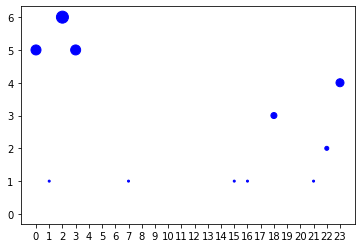

In [20]:
x_axis = alcohol_time['Hour']
y_axis = alcohol_time['Alcohol count']
plt.scatter(x_axis,y_axis, color='b',s=(2*y_axis)**2)
plt.xticks(range(0,24))
print('Alochol related collision occur more frequently in evening hours')

In [21]:
#Time PATTERNS
print('Create bins for time of accident.')
print('They are separated first into 4 hour sections:')
print('Midnight: 12am-3am, Early Morning: 3am-6am, Morning Commute: 6am-9am,')
print('Morning: 9am-12pm, Afternoon: 12pm-3pm, Late Afternoon: 3pm-6pm, Evening: 6pm-9pm, Night: 9-midnight')

Create bins for time of accident.
They are separated first into 4 hour sections:
Midnight: 12am-3am, Early Morning: 3am-6am, Morning Commute: 6am-9am,
Morning: 9am-12pm, Afternoon: 12pm-3pm, Late Afternoon: 3pm-6pm, Evening: 6pm-9pm, Night: 9-midnight


In [22]:
# Bin times, compare the collision rates, correlation with alcohol consumption
alochol_bins= [x for x in range(0,26,3)]
print(alochol_bins)
time_names = ['Early Morning', 'Morning Commute', 'Morning', 
              'Afternoon','Late Afternoon','Evening','Night','Midnight']

[0, 3, 6, 9, 12, 15, 18, 21, 24]


In [23]:
toronto_collision["Time Bins"] = pd.cut(toronto_collision["Hour"], alochol_bins, labels=time_names, include_lowest=True)
toronto_collision_alcohol=toronto_collision.groupby('Time Bins')


In [24]:
alcohol_time_grouped = (toronto_collision_alcohol
         .apply(lambda x: (x['Alcohol']== 'Yes').sum())
         .reset_index(name='Alcohol count'))
alcohol_time_grouped=alcohol_time_grouped.reindex([1,2,3,4,5,6,7,0])
alcohol_time_grouped['Time numbered']= [0,1,2,3,4,5,6,7]
alcohol_time_grouped

,Time Bins,Alcohol count,Time numbered
1,Morning Commute,0,0
2,Morning,1,1
3,Afternoon,0,2
4,Late Afternoon,1,3
5,Evening,4,4
6,Night,1,5
7,Midnight,6,6
0,Early Morning,17,7


In [25]:
def plot_graph(x,y):
    plt.scatter(x,y)
    plt.ylim(-2,18)
    plt.xlim(-.2,7.5)
    #Correlation
    _slope, _int, _r, _p, _std_err = sts.linregress(x, y)
    best_fit = _slope * x + _int
    plt.plot(x,best_fit,"r-", linewidth=.5)
    line_eq = "y = " + str(round(_slope,2)) + "x + " + str(round(_int,2))
    plt.annotate(line_eq,(4,15),fontsize=12,color="red")
    r='r=' + str(round(_r,2))
    rr='r^2=' + str(round(_r**2,2))
    plt.annotate(r,(4.5,13.5),fontsize=12,color="red")
    plt.annotate(rr,(4.5,12),fontsize=12,color="red")
    #pearon correlation statement
    pearson_r=sts.pearsonr(x,y)[0]
    if abs(pearson_r)>0.7:
        print(f'The r value is {round(pearson_r,2)}, there is strong correlation time of collision and alcohol being involved')

The r value is 0.76, there is strong correlation time of collision and alcohol being involved
Alochol related collision occur more frequently in evening hours


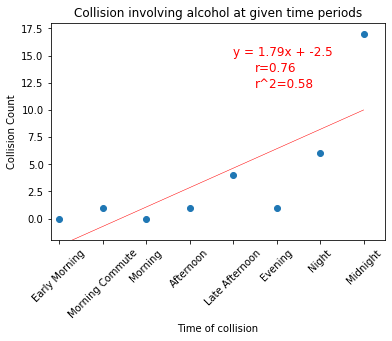

In [26]:
x_axis = alcohol_time_grouped.loc[:,'Time numbered']
y_axis = alcohol_time_grouped.loc[:,'Alcohol count']

plot_graph(x_axis,y_axis)

plt.xlabel('Time of collision')
plt.ylabel('Collision Count')
plt.title('Collision involving alcohol at given time periods')
plt.xticks(x_axis,time_names,rotation=45)

plt.savefig('Figures/alc_time.png')
print('Alochol related collision occur more frequently in evening hours')



In [ ]:
#collision count vs bins - good amount of data points in each bin (distribution- present this. explain in presentation the limitations with alcohol- do an anual map of reductions in other differences (district!!))

In [24]:
# plot Aggressive Driving
Aggr_time = (toronto_collision_hour
         .apply(lambda x: (x['Aggressive/Distracted Driving']== 'Yes').sum())
         .reset_index(name='Aggresive count'))

No observable trend with time


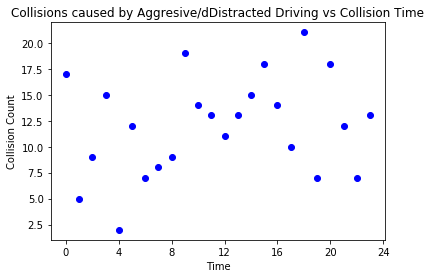

In [25]:
x_axis = Aggr_time['Hour']
y_axis = Aggr_time['Aggresive count']
plt.scatter(x_axis,y_axis, color='b')
plt.xticks(range(0,25,4))
plt.xlabel('Time')
plt.ylabel('Collision Count')
plt.title("Collisions caused by Aggresive/dDistracted Driving vs Collision Time")
print('No observable trend with time')
plt.savefig('Figures/aggr_v_time.png')

In [26]:
# plot Cyclists
cycle_time = (toronto_collision_hour
         .apply(lambda x: (x['Cyclist']== 'Yes').sum())
         .reset_index(name='Cyclist count'))

No observable trend with time


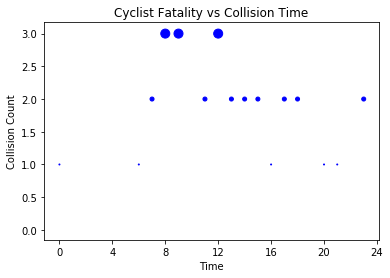

In [27]:
x_axis = cycle_time['Hour']
y_axis = cycle_time['Cyclist count']
plt.scatter(x_axis,y_axis, color='b', s=y_axis**4)
plt.xticks(range(0,25,4))
plt.xlabel('Time')
plt.ylabel('Collision Count')
plt.title("Cyclist Fatality vs Collision Time")
print('No observable trend with time')
plt.savefig('Figures/cyclist_v_time.png')